In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mimic-clinical-data/mimiciii_readmission_risk_data.csv


Data source: 
Johnson, A., Pollard, T., & Mark, R. (2019). MIMIC-III Clinical Database Demo (version 1.4). PhysioNet. https://doi.org/10.13026/C2HM2Q.

Additionally, please cite the original publication:
Johnson, A. E. W., Pollard, T. J., Shen, L., Lehman, L. H., Feng, M., Ghassemi, M., Moody, B., Szolovits, P., Celi, L. A., & Mark, R. G. (2016). MIMIC-III, a freely accessible critical care database. Scientific Data, 3, 160035.

PhysioNet:
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

In [2]:
df = pd.read_csv('/kaggle/input/mimic-clinical-data/mimiciii_readmission_risk_data.csv')
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,subject_id,hadm_id,admittime_dt,dischtime_dt,readmit_30d,insurance,discharge_location,days_since_last_discharge,los_days,age,...,has_diabetes,has_hypertension,has_chf,has_ckd,has_copd,has_cancer,avg_sodium,avg_heart_rate,primary_diagnosis,primary_diagnosis_group
0,204,181170,2122-06-14T02:11:00,2122-06-16T12:40:00,0,Medicaid,HOME,NaN,2,0.0,...,0,0,0,0,0,0,NaN,NaN,"Single liveborn, born in hospital, delivered w...",NaN
1,302,191028,2133-03-29T02:33:00,2133-04-01T12:15:00,0,Private,HOME,NaN,3,59.0,...,0,1,1,0,0,0,139.000000,60.325000,Acute myocardial infarction of other anterior ...,NaN
2,397,114149,2152-07-31T17:19:00,2152-08-07T20:52:00,0,Private,HOME,NaN,7,20.0,...,0,0,0,0,0,0,140.090909,83.883721,Closed fracture of base of skull without menti...,NaN
3,537,123969,2164-01-27T19:05:00,2164-01-30T11:15:00,0,Private,HOME,NaN,3,0.0,...,0,0,0,0,0,0,NaN,129.200000,"Single liveborn, born in hospital, delivered w...",NaN
4,583,193132,2129-05-30T18:59:00,2129-06-07T14:30:00,0,Private,HOME HEALTH CARE,NaN,8,63.9,...,0,0,1,0,0,0,136.000000,79.580645,Coronary atherosclerosis of native coronary ar...,NaN


In [3]:
df.columns

Index(['subject_id', 'hadm_id', 'admittime_dt', 'dischtime_dt', 'readmit_30d',
       'insurance', 'discharge_location', 'days_since_last_discharge',
       'los_days', 'age', 'gender', 'total_admissions', 'num_comorbidities',
       'has_diabetes', 'has_hypertension', 'has_chf', 'has_ckd', 'has_copd',
       'has_cancer', 'avg_sodium', 'avg_heart_rate', 'primary_diagnosis',
       'primary_diagnosis_group'],
      dtype='object')

In [4]:
df.shape

(38915, 23)

readmit_30d
0    0.942541
1    0.057459
Name: proportion, dtype: float64


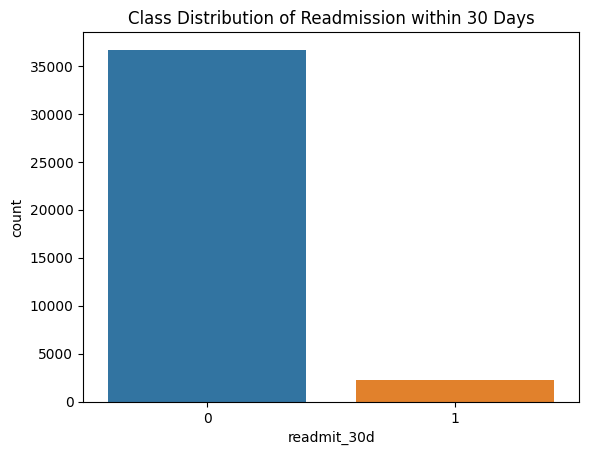

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


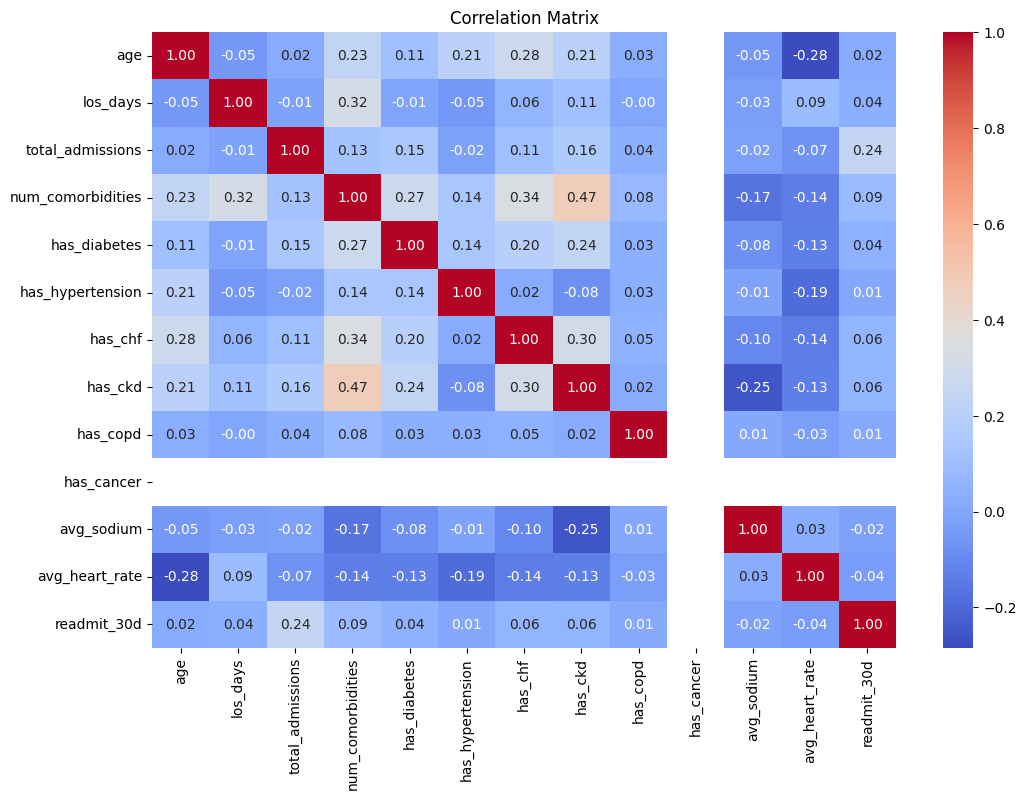

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


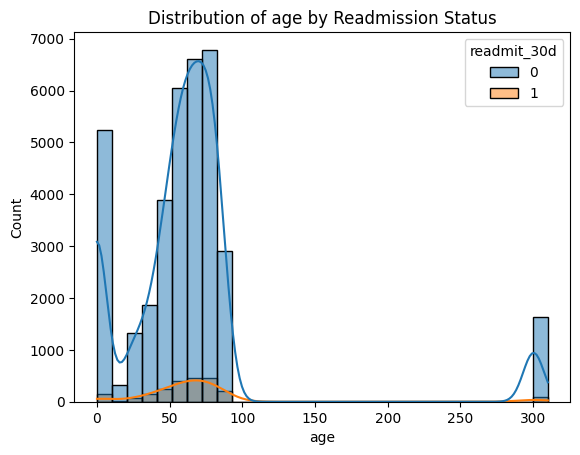

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

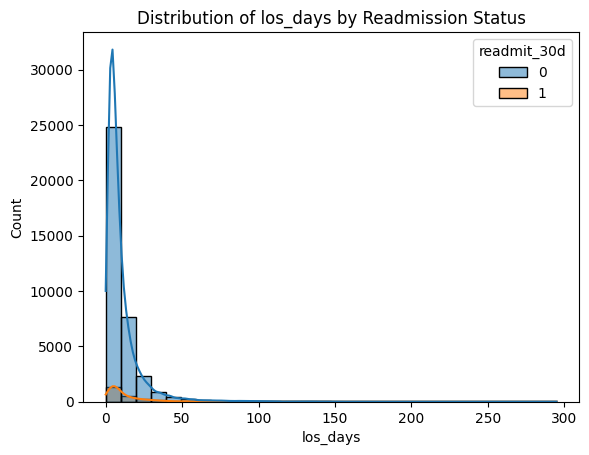

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

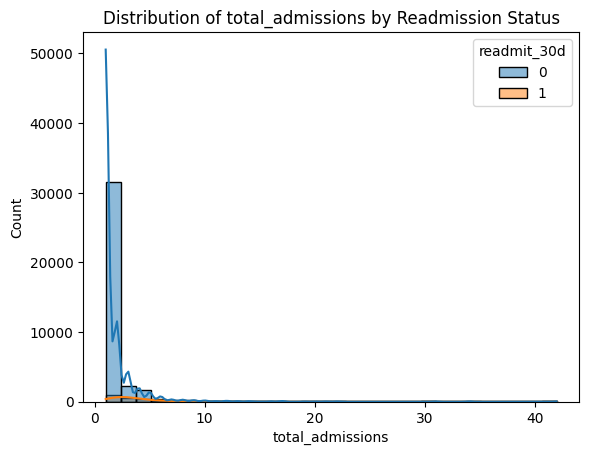

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

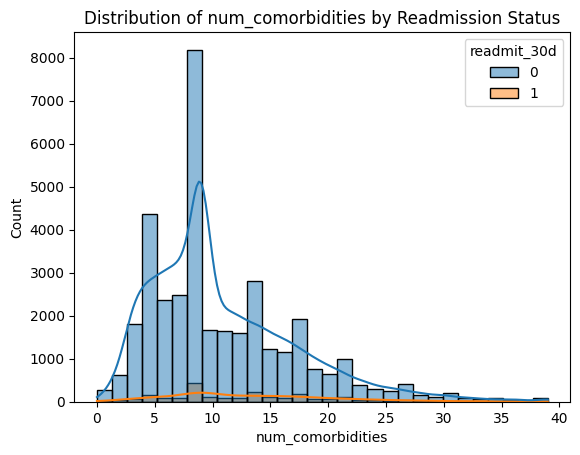

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


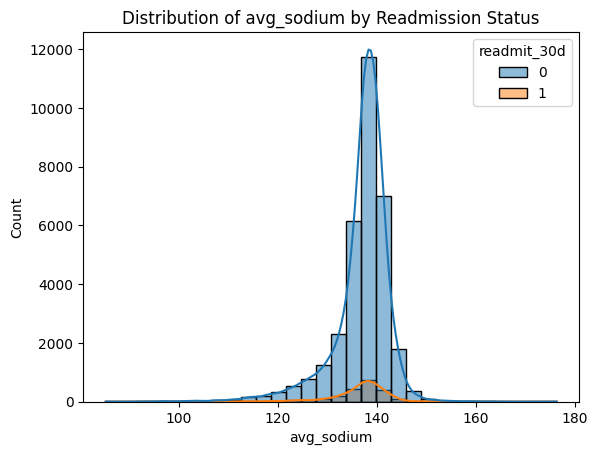

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


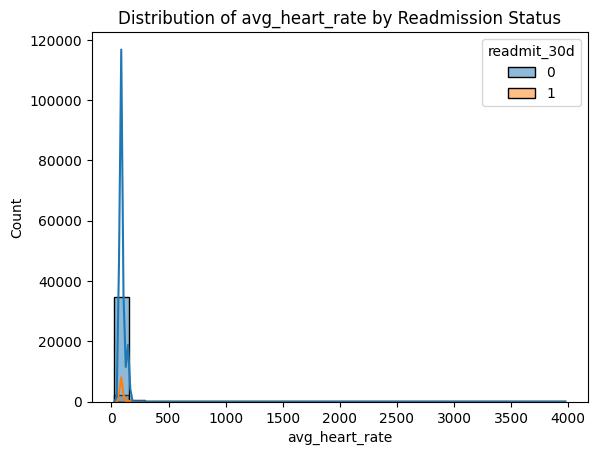

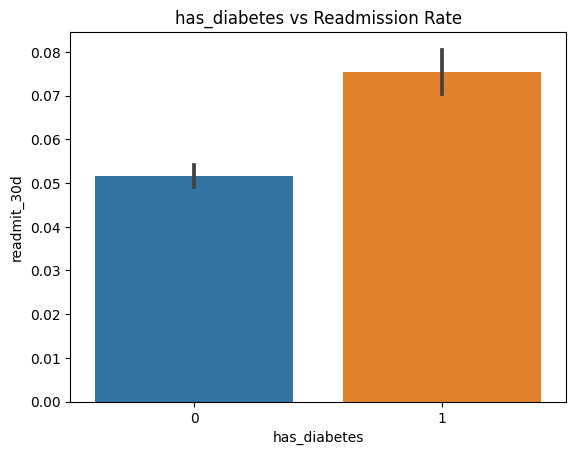

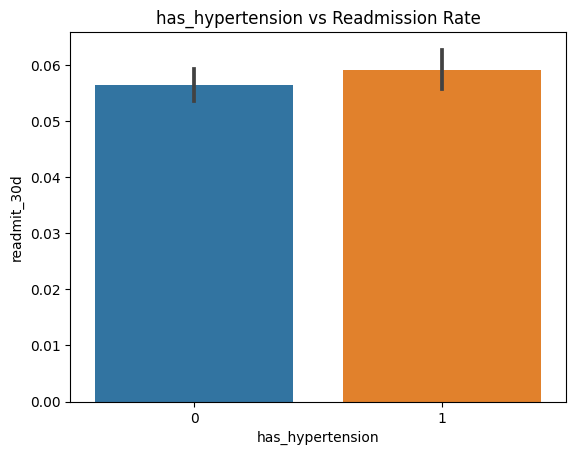

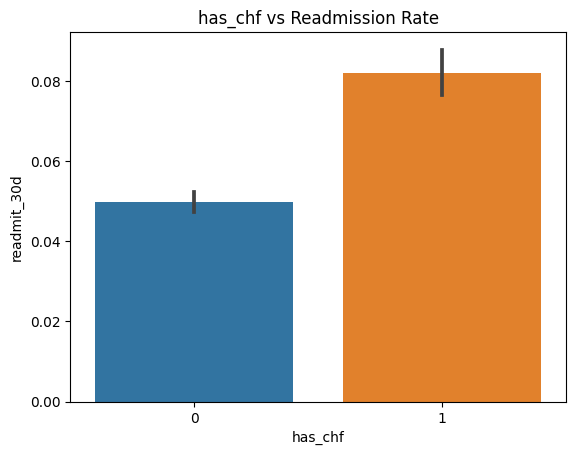

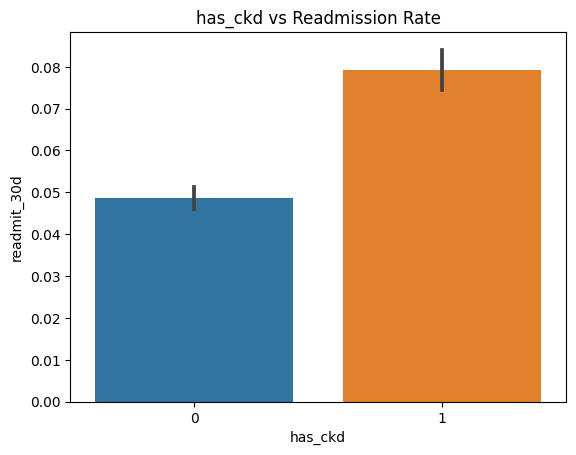

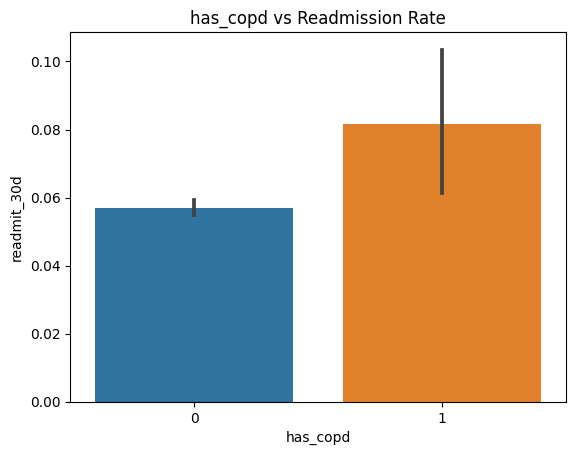

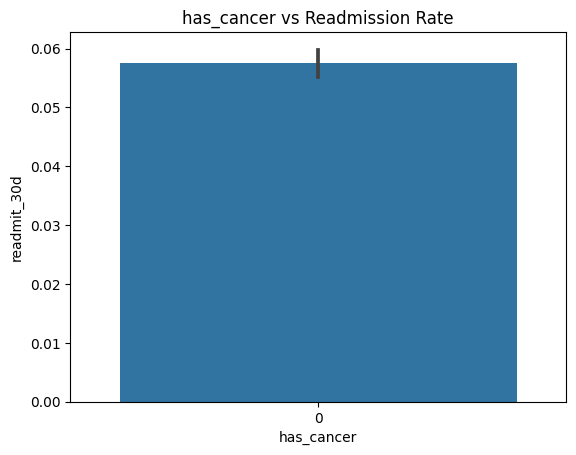

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Your DataFrame should already be defined, here assumed as 'df'
label = 'readmit_30d'
features = [
    'age', 'los_days', 'total_admissions', 'num_comorbidities',
    'has_diabetes', 'has_hypertension', 'has_chf', 'has_ckd', 'has_copd', 'has_cancer',
    'avg_sodium', 'avg_heart_rate'
]

# 1. Check class distribution
print(df[label].value_counts(normalize=True))
sns.countplot(data=df, x=label)
plt.title("Class Distribution of Readmission within 30 Days")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + [label]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Distribution plots for numeric variables
num_features = ['age', 'los_days', 'total_admissions', 'num_comorbidities', 'avg_sodium', 'avg_heart_rate']
for col in num_features:
    plt.figure()
    sns.histplot(df, x=col, hue=label, kde=True, bins=30)
    plt.title(f"Distribution of {col} by Readmission Status")
    plt.show()

# 4. Bar plots for binary categorical features
cat_features = ['has_diabetes', 'has_hypertension', 'has_chf', 'has_ckd', 'has_copd', 'has_cancer']
for col in cat_features:
    plt.figure()
    sns.barplot(data=df, x=col, y=label)
    plt.title(f"{col} vs Readmission Rate")
    plt.show()




In [6]:
# Drop rows with any NaN or Inf in selected columns
df_clean = df[features + [label]].replace([np.inf, -np.inf], np.nan).dropna()

# Define cleaned versions of features and label
X_clean = df_clean[features]
y_clean = df_clean[label]


In [7]:
print("\nUnivariate Logistic Regression Summary (cleaned):")
for feature in features:
    X_uni = add_constant(X_clean[[feature]])
    model = Logit(y_clean, X_uni).fit(disp=0)
    print(f"\nFeature: {feature}")
    print(model.summary2().tables[1][["Coef.", "P>|z|"]])



Univariate Logistic Regression Summary (cleaned):

Feature: age
          Coef.     P>|z|
const -2.805330  0.000000
age    0.000658  0.087528

Feature: los_days
             Coef.         P>|z|
const    -2.865160  0.000000e+00
los_days  0.009199  4.855791e-11

Feature: total_admissions
                     Coef.          P>|z|
const            -3.184147   0.000000e+00
total_admissions  0.166019  6.460887e-164

Feature: num_comorbidities
                      Coef.         P>|z|
const             -3.408765  0.000000e+00
num_comorbidities  0.050839  3.564726e-60

Feature: has_diabetes
                 Coef.         P>|z|
const        -2.868544  0.000000e+00
has_diabetes  0.366563  4.145887e-14

Feature: has_hypertension
                     Coef.     P>|z|
const            -2.747840  0.000000
has_hypertension -0.024599  0.596782

Feature: has_chf
            Coef.         P>|z|
const   -2.916632  0.000000e+00
has_chf  0.507497  2.162512e-26

Feature: has_ckd
            Coef.         P>

LinAlgError: Singular matrix

Feature	Coefficient	P-value	Interpretation
los_days	0.0092	4.86e-11	Longer stays → higher readmission risk
total_admissions	0.1660	~0	More past admissions → higher risk
num_comorbidities	0.0508	~0	More comorbidities → higher risk
has_diabetes	0.3666	4.15e-14	Diabetic patients → higher risk
has_chf	0.5075	2.16e-26	Congestive heart failure → higher risk
has_ckd	0.5001	4.72e-27	Chronic kidney disease → higher risk
has_copd	0.3514	0.0146	COPD → higher risk

In [8]:
# create custom risk score 
def readmission_risk_score(row):
    score = 0
    
    # Length of Stay (LOS) > 7 days gives higher risk
    if row['los_days'] > 7:
        score += 1
    
    # Total Admissions >= 3 gives higher risk
    if row['total_admissions'] >= 3:
        score += 1
    
    # More than 2 comorbidities increases the risk
    if row['num_comorbidities'] >= 2:
        score += 1
    
    # Diabetes, CHF, CKD, COPD, and other conditions increase risk
    if row['has_diabetes']:
        score += 1
    if row['has_chf']:
        score += 1
    if row['has_ckd']:
        score += 1
    if row['has_copd']:
        score += 1
    
    return score


In [9]:
# apply function to df 
df['readmission_risk_score'] = df.apply(readmission_risk_score, axis=1)


In [10]:
# Assign Risk Categories Based on the Score
def risk_level(score):
    if score <= 2:
        return "Low"
    elif score <= 4:
        return "Moderate"
    else:
        return "High"

df['risk_level'] = df['readmission_risk_score'].apply(risk_level)


In [11]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,subject_id,hadm_id,admittime_dt,dischtime_dt,readmit_30d,insurance,discharge_location,days_since_last_discharge,los_days,age,...,has_chf,has_ckd,has_copd,has_cancer,avg_sodium,avg_heart_rate,primary_diagnosis,primary_diagnosis_group,readmission_risk_score,risk_level
0,204,181170,2122-06-14T02:11:00,2122-06-16T12:40:00,0,Medicaid,HOME,NaN,2,0.0,...,0,0,0,0,NaN,NaN,"Single liveborn, born in hospital, delivered w...",NaN,1,Low
1,302,191028,2133-03-29T02:33:00,2133-04-01T12:15:00,0,Private,HOME,NaN,3,59.0,...,1,0,0,0,139.000000,60.325000,Acute myocardial infarction of other anterior ...,NaN,2,Low
2,397,114149,2152-07-31T17:19:00,2152-08-07T20:52:00,0,Private,HOME,NaN,7,20.0,...,0,0,0,0,140.090909,83.883721,Closed fracture of base of skull without menti...,NaN,1,Low
3,537,123969,2164-01-27T19:05:00,2164-01-30T11:15:00,0,Private,HOME,NaN,3,0.0,...,0,0,0,0,NaN,129.200000,"Single liveborn, born in hospital, delivered w...",NaN,1,Low
4,583,193132,2129-05-30T18:59:00,2129-06-07T14:30:00,0,Private,HOME HEALTH CARE,NaN,8,63.9,...,1,0,0,0,136.000000,79.580645,Coronary atherosclerosis of native coronary ar...,NaN,3,Moderate


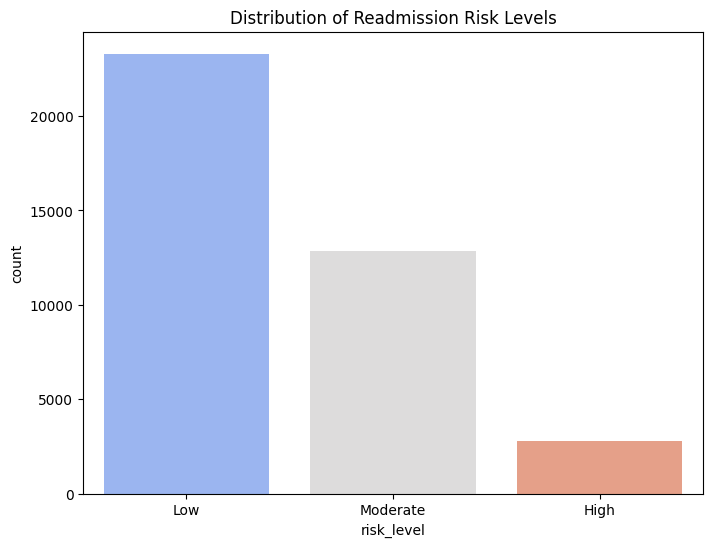

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='risk_level', data=df, palette='coolwarm')
plt.title('Distribution of Readmission Risk Levels')
plt.show()


In [18]:
# Value counts of risk_level
df['risk_level'].value_counts()


risk_level
Low         23305
Moderate    12838
High         2772
Name: count, dtype: int64

In [19]:
# Descriptive statistics of numerical features
df.describe()


,subject_id,hadm_id,readmit_30d,days_since_last_discharge,los_days,age,total_admissions,num_comorbidities,has_diabetes,has_hypertension,has_chf,has_ckd,has_copd,has_cancer,avg_sodium,avg_heart_rate,readmission_risk_score
count,38915.000000,38915.000000,38915.000000,8258.00000,38915.000000,38915.000000,38915.000000,38915.000000,38915.000000,38915.000000,38915.000000,38915.000000,38915.000000,38915.0,34916.000000,37425.000000,38915.000000
mean,33530.683927,150005.639316,0.057459,404.70247,10.103045,64.375452,1.918772,11.025491,0.245047,0.379185,0.240010,0.288192,0.017628,0.0,137.004135,93.103101,2.377078
std,27967.322718,28910.534301,0.232720,629.07592,12.431969,57.346923,2.656870,6.464647,0.430121,0.485191,0.427095,0.452927,0.131597,0.0,5.664527,35.083983,1.275818
min,2.000000,100001.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,85.250000,26.357143,0.000000
25%,11932.000000,124978.500000,0.000000,27.00000,4.000000,43.400000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,135.424728,77.529032,1.000000
50%,24072.000000,150013.000000,0.000000,124.00000,6.000000,61.700000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,138.000000,86.875000,2.000000
75%,53255.000000,175155.500000,0.000000,499.00000,12.000000,75.800000,2.000000,14.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,140.125000,99.416058,3.000000
max,99995.000000,199999.000000,1.000000,4032.00000,295.000000,310.200000,42.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,176.333333,3975.166667,7.000000


In [20]:
# Value counts of gender across risk levels
df.groupby('risk_level')['gender'].value_counts()


risk_level  gender
High        M          1540
            F          1232
Low         M         13067
            F         10238
Moderate    M          7128
            F          5710
Name: count, dtype: int64

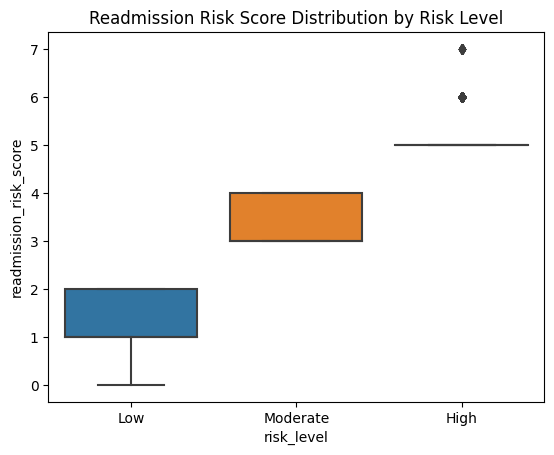

In [22]:
# Boxplot of readmission_risk_score by risk level
sns.boxplot(data=df, x='risk_level', y='readmission_risk_score')
plt.title('Readmission Risk Score Distribution by Risk Level')
plt.show()



In [27]:
# Value counts of insurance type by risk level
insurance_by_risk = df.groupby('risk_level')['insurance'].value_counts()
print(insurance_by_risk)


risk_level  insurance 
High        Medicare       2067
            Private         473
            Medicaid        208
            Government       22
            Self Pay          2
Low         Private       11446
            Medicare       8074
            Medicaid       2533
            Government      885
            Self Pay        367
Moderate    Medicare       8371
            Private        3054
            Medicaid       1076
            Government      278
            Self Pay         59
Name: count, dtype: int64


In [32]:
high_risk_medicare_ratio = 2067 / 2772
moderate_risk_medicare_ratio = 8371 / 10662
low_risk_medicare_ratio = 8074 / 20697
print(high_risk_medicare_ratio)
print(moderate_risk_medicare_ratio)
print(low_risk_medicare_ratio)

0.7456709956709957
0.7851247420746577
0.39010484611296325


In [33]:
# Group by Medicare and calculate the average risk score
medicare_risk_score = df[df['insurance'] == 'Medicare']['readmission_risk_score']
non_medicare_risk_score = df[df['insurance'] != 'Medicare']['readmission_risk_score']

# Compare the means
print(f"Mean readmission risk score for Medicare: {medicare_risk_score.mean()}")
print(f"Mean readmission risk score for Non-Medicare: {non_medicare_risk_score.mean()}")


Mean readmission risk score for Medicare: 2.8364844425237683
Mean readmission risk score for Non-Medicare: 1.9602509434887025


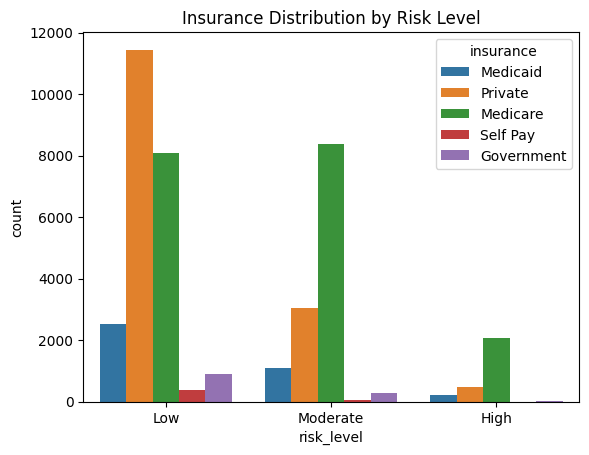

In [23]:
# Count plot of insurance type by risk level
sns.countplot(data=df, x='risk_level', hue='insurance')
plt.title('Insurance Distribution by Risk Level')
plt.show()


In [34]:
# Gender
# Group by gender and calculate the average risk score
male_risk_score = df[df['gender'] == 'M']['readmission_risk_score']
female_risk_score = df[df['gender'] == 'F']['readmission_risk_score']

# Compare the means
print(f"Mean readmission risk score for Male: {male_risk_score.mean()}")
print(f"Mean readmission risk score for Female: {female_risk_score.mean()}")


Mean readmission risk score for Male: 2.3703243616287093
Mean readmission risk score for Female: 2.3856228172293363


In [36]:
# Define a function to calculate and display the mean readmission risk score for each category of a feature
def mean_risk_by_feature(df, feature_name):
    feature_groups = df.groupby(feature_name)['readmission_risk_score'].mean()
    print(f"Mean readmission risk score by {feature_name}:")
    print(feature_groups)
    print("\n")

# Example: Mean readmission risk score by different features

# Insurance
mean_risk_by_feature(df, 'insurance')

# Comorbidities (For example: diabetes, hypertension, CHF, etc.)
mean_risk_by_feature(df, 'has_diabetes')
mean_risk_by_feature(df, 'has_hypertension')
mean_risk_by_feature(df, 'has_chf')

# Other important features you identified (e.g., number of comorbidities, total admissions, etc.)
mean_risk_by_feature(df, 'num_comorbidities')
mean_risk_by_feature(df, 'total_admissions')


Mean readmission risk score by insurance:
insurance
Government    1.918987
Medicaid      2.210375
Medicare      2.836484
Private       1.909504
Self Pay      1.619159
Name: readmission_risk_score, dtype: float64


Mean readmission risk score by has_diabetes:
has_diabetes
0    1.974880
1    3.616191
Name: readmission_risk_score, dtype: float64


Mean readmission risk score by has_hypertension:
has_hypertension
0    2.336272
1    2.443887
Name: readmission_risk_score, dtype: float64


Mean readmission risk score by has_chf:
has_chf
0    1.930178
1    3.792184
Name: readmission_risk_score, dtype: float64


Mean readmission risk score by num_comorbidities:
num_comorbidities
0     0.068966
1     0.185484
2     1.156156
3     1.144385
4     1.264331
5     1.448083
6     1.658507
7     1.819844
8     1.987805
9     2.577545
10    2.256657
11    2.429476
12    2.570585
13    2.764439
14    2.802294
15    2.952667
16    3.066129
17    3.171779
18    3.321281
19    3.357057
20    3.440171
21    

Medicare insurance, diabetes, and CHF are major factors contributing to higher readmission risk, with Medicare and CHF showing the most substantial impact. Number of comorbidities and total admissions both show strong relationships with the readmission risk score.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


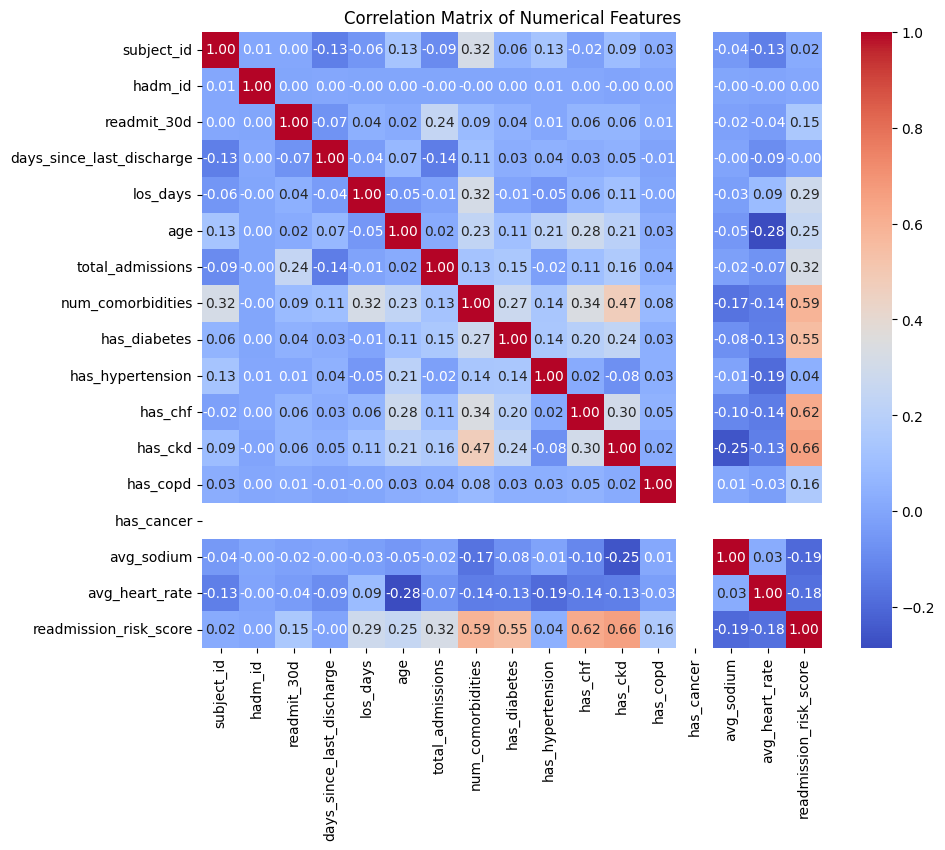

In [24]:
# Correlation matrix of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [25]:
# Group by risk level and calculate the mean for numerical features
df.groupby('risk_level')[numerical_cols].mean()


,subject_id,hadm_id,readmit_30d,days_since_last_discharge,los_days,age,total_admissions,num_comorbidities,has_diabetes,has_hypertension,has_chf,has_ckd,has_copd,has_cancer,avg_sodium,avg_heart_rate,readmission_risk_score
risk_level,,,,,,,,,,,,,,,,,
High,32192.101371,150864.134560,0.151876,376.165450,15.174964,81.855808,4.104618,18.660173,0.821789,0.305195,0.884560,0.914502,0.076479,0.0,135.101181,83.281674,5.190115
Low,32916.379446,149987.814718,0.033169,404.824602,7.988243,53.134761,1.345934,8.364128,0.080026,0.360438,0.047458,0.062819,0.004377,0.0,137.909590,97.869233,1.486033
Moderate,34934.868126,149852.628992,0.081165,416.245727,12.846939,81.006450,2.486680,14.208210,0.420081,0.429195,0.450382,0.562081,0.028976,0.0,136.026723,86.635986,3.387210


In [40]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialize LogisticRegression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (high-risk group)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1 (high risk)

# Adjust threshold to improve recall for high-risk class
threshold = 0.4  # Lower threshold for higher recall
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Evaluate performance with new threshold
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))


Confusion Matrix:
[[3829  785]
 [ 383 2786]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4614
           1       0.78      0.88      0.83      3169

    accuracy                           0.85      7783
   macro avg       0.84      0.85      0.85      7783
weighted avg       0.86      0.85      0.85      7783



In [41]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],   # Lasso or Ridge Regularization
    'solver': ['liblinear', 'saga']  # Solvers that support l1 penalty
}

# Initialize logistic regression model with balanced class weight
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Apply grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [42]:
# refit with optimal parameters
# Use the best parameters found by grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3997  617]
 [ 483 2686]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4614
           1       0.81      0.85      0.83      3169

    accuracy                           0.86      7783
   macro avg       0.85      0.86      0.85      7783
weighted avg       0.86      0.86      0.86      7783



In [43]:
# Add predicted class and probability to the dataframe
df['predicted_readmission'] = best_model.predict(X)
df['predicted_probability'] = best_model.predict_proba(X)[:, 1]  # Probability of class 1 (high risk)


In [47]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,subject_id,hadm_id,admittime_dt,dischtime_dt,readmit_30d,insurance,discharge_location,days_since_last_discharge,los_days,age,...,has_copd,has_cancer,avg_sodium,avg_heart_rate,primary_diagnosis,primary_diagnosis_group,readmission_risk_score,risk_level,predicted_readmission,predicted_probability
0,204,181170,2122-06-14T02:11:00,2122-06-16T12:40:00,0,0,HOME,NaN,2,0.0,...,0,0,NaN,NaN,"Single liveborn, born in hospital, delivered w...",NaN,1,Low,1,0.960163
1,302,191028,2133-03-29T02:33:00,2133-04-01T12:15:00,0,0,HOME,NaN,3,59.0,...,0,0,139.000000,60.325000,Acute myocardial infarction of other anterior ...,NaN,2,Low,1,0.999984
2,397,114149,2152-07-31T17:19:00,2152-08-07T20:52:00,0,0,HOME,NaN,7,20.0,...,0,0,140.090909,83.883721,Closed fracture of base of skull without menti...,NaN,1,Low,1,0.999817
3,537,123969,2164-01-27T19:05:00,2164-01-30T11:15:00,0,0,HOME,NaN,3,0.0,...,0,0,NaN,129.200000,"Single liveborn, born in hospital, delivered w...",NaN,1,Low,1,0.998398
4,583,193132,2129-05-30T18:59:00,2129-06-07T14:30:00,0,0,HOME HEALTH CARE,NaN,8,63.9,...,0,0,136.000000,79.580645,Coronary atherosclerosis of native coronary ar...,NaN,3,Moderate,1,0.999594


In [48]:
# Save to CSV
df.to_csv('/kaggle/working/readmission_risk_predictions.csv', index=False)


readmission_risk_score: A numeric score representing the calculated likelihood of a patient being readmitted.

risk_level: A categorized risk group (e.g., Low, Moderate, High) derived from the risk score.

predicted_readmission: The logistic regression model’s prediction (1 = will be readmitted, 0 = won’t be).

predicted_probability: The model's estimated probability of readmission for each patient

In [46]:
import os

# List files in the working directory
print(os.listdir('/kaggle/working'))


['.virtual_documents', 'readmission_risk_predictions.csv']
